Entrez le ticker de l'action (ex : AAPL pour Apple) :  AAPL


Analyse de l'action : AAPL
4. PER (Price-to-Earnings Ratio) : 39.059113 - Un PER compris entre 15 et 25 est généralement considéré comme raisonnable. Un PER très élevé peut indiquer une valorisation excessive.
5. Dividende annuel : 0.42% - Un dividende supérieur à 2% est souvent considéré comme intéressant pour les investisseurs recherchant un revenu stable.

6. Rendement annuel moyen : 28.57%
   - Plages pour le rendement annuel moyen :
     * > 10% : Excellent rendement (peut indiquer une forte croissance).
     * 5%-10% : Bon rendement.
     * < 5% : Rendement faible, peut-être stable ou en déclin.
7. Volatilité annuelle (risque) : 31.63%
   - Plages pour la volatilité :
     * < 15% : Faible volatilité, action stable.
     * 15%-30% : Volatilité modérée.
     * > 30% : Volatilité élevée, plus risquée.
8. Ratio de Sharpe : 0.90
   - Plages pour le ratio de Sharpe :
     * > 1.0 : Excellent (rendement justifie le risque).
     * 0.5-1.0 : Acceptable.
     * < 0.5 : Mauvais (risque él

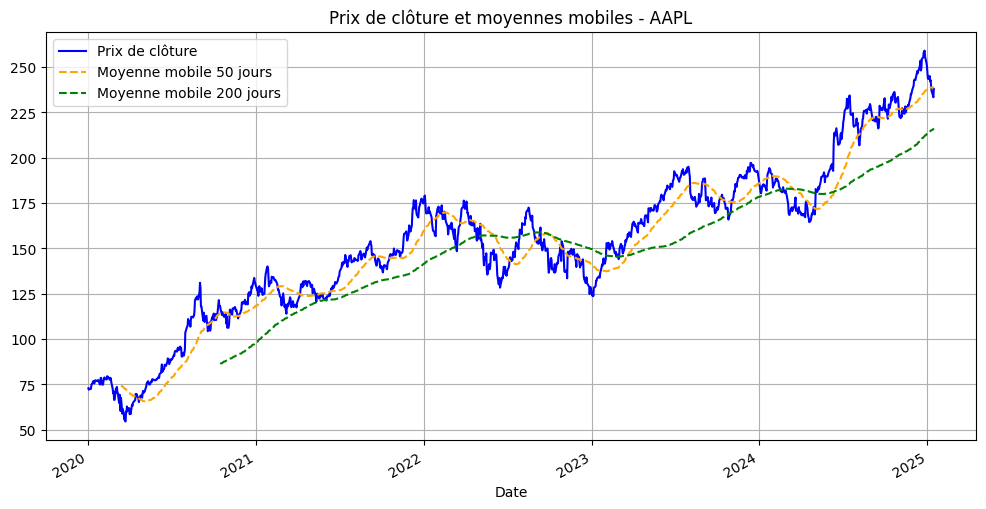

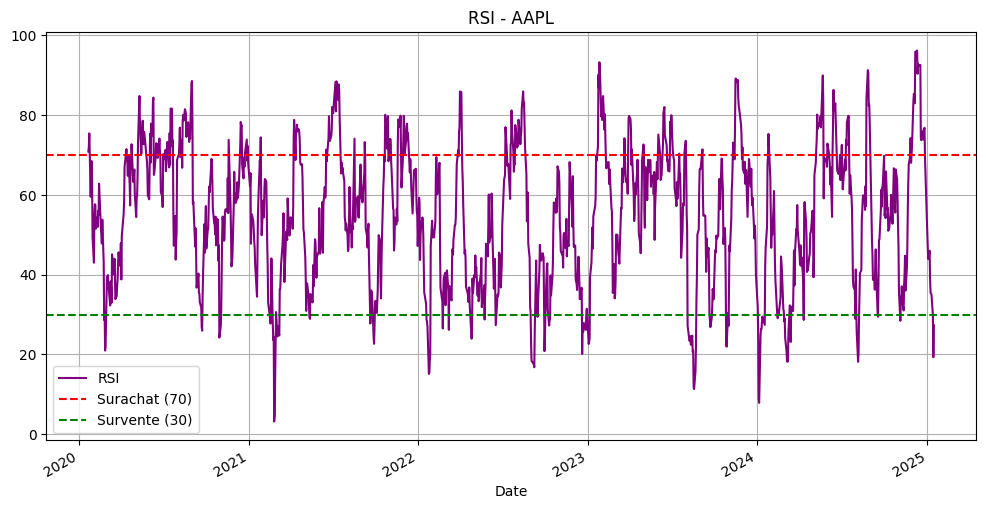

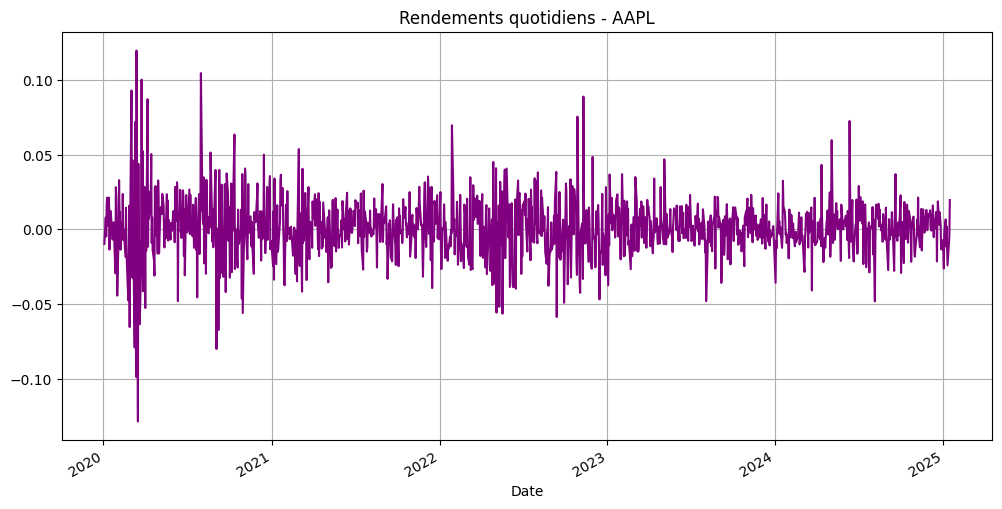

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Fonction pour calculer le RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    """Calcule le RSI à partir des prix de clôture."""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def analyser_action(ticker, start_date="2020-01-01"):
    """
    Analyse une action avec son ticker et affiche des informations importantes pour investir.
    Inclut des métriques fondamentales et techniques.
    """
    print(f"Analyse de l'action : {ticker}")
    print("=" * 40)

    # Déterminer la date actuelle
    aujourd_hui = datetime.today().strftime('%Y-%m-%d')

    # Télécharger les données de l'action
    try:
        action = yf.Ticker(ticker)
        data = action.history(start=start_date, end=aujourd_hui)
    except Exception as e:
        print(f"Erreur lors du téléchargement des données : {e}")
        return

    if data.empty:
        print("Erreur : Les données téléchargées sont vides. Vérifiez le ticker ou la période.")
        return

    # Informations fondamentales
    try:
        info = action.info
        print(f"4. PER (Price-to-Earnings Ratio) : {info.get('trailingPE', 'N/A')} - Un PER compris entre 15 et 25 est généralement considéré comme raisonnable. Un PER très élevé peut indiquer une valorisation excessive.")
        print(f"5. Dividende annuel : {info.get('dividendYield', 'N/A') * 100:.2f}% - Un dividende supérieur à 2% est souvent considéré comme intéressant pour les investisseurs recherchant un revenu stable.")
    except Exception as e:
        print(f"Erreur lors de l'extraction des informations fondamentales : {e}")

    # Calculs des indicateurs techniques
    data['Daily Return'] = data['Close'].pct_change()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['RSI'] = calculate_rsi(data['Close'])

    # Calcul des métriques financières
    annual_return = data['Daily Return'].mean() * 252
    annual_volatility = data['Daily Return'].std() * (252 ** 0.5)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0

    print(f"\n6. Rendement annuel moyen : {annual_return:.2%}")
    print("   - Plages pour le rendement annuel moyen :")
    print("     * > 10% : Excellent rendement (peut indiquer une forte croissance).")
    print("     * 5%-10% : Bon rendement.")
    print("     * < 5% : Rendement faible, peut-être stable ou en déclin.")

    print(f"7. Volatilité annuelle (risque) : {annual_volatility:.2%}")
    print("   - Plages pour la volatilité :")
    print("     * < 15% : Faible volatilité, action stable.")
    print("     * 15%-30% : Volatilité modérée.")
    print("     * > 30% : Volatilité élevée, plus risquée.")

    print(f"8. Ratio de Sharpe : {sharpe_ratio:.2f}")
    print("   - Plages pour le ratio de Sharpe :")
    print("     * > 1.0 : Excellent (rendement justifie le risque).")
    print("     * 0.5-1.0 : Acceptable.")
    print("     * < 0.5 : Mauvais (risque élevé par rapport au rendement).")

    # Conseils sur l'investissement
    print("\n10. Mes conseils :")
    if sharpe_ratio > 1.0 and annual_return > 0.10:
        print("   - Investissez maintenant : Le rendement est élevé et justifie le risque.")
    elif 0.5 <= sharpe_ratio <= 1.0 and annual_return > 0.05:
        print("   - Attendez : Le rendement est correct, mais évaluez les tendances à court terme avant d'investir.")
    else:
        print("   - Ne pas investir : Le risque est trop élevé par rapport au rendement potentiel.")

    print("\n11. Analyse des tendances avec les moyennes mobiles et RSI :")
    print("   - SMA 50 jours : Moyenne des prix de clôture sur les 50 derniers jours pour détecter les tendances à court terme.")
    print("   - SMA 200 jours : Moyenne des prix de clôture sur les 200 derniers jours pour identifier les tendances à long terme.")
    print("   - RSI : Indique les niveaux de surachat (>70, signal de vente possible) ou de survente (<30, signal d'achat possible).")

    afficher_graphiques(data, ticker)

def afficher_graphiques(data, ticker):
    """
    Affiche les graphiques pour les tendances et les indicateurs techniques.
    """
    plt.figure(figsize=(12, 6))
    data['Close'].plot(label='Prix de clôture', color='blue')
    data['SMA_50'].plot(label='Moyenne mobile 50 jours', linestyle='--', color='orange')
    data['SMA_200'].plot(label='Moyenne mobile 200 jours', linestyle='--', color='green')
    plt.title(f"Prix de clôture et moyennes mobiles - {ticker}")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    data['RSI'].plot(title=f"RSI - {ticker}", color='purple')
    plt.axhline(70, linestyle='--', color='red', label='Surachat (70)')
    plt.axhline(30, linestyle='--', color='green', label='Survente (30)')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    data['Daily Return'].plot(title=f"Rendements quotidiens - {ticker}", color='purple')
    plt.grid()
    plt.show()

# Exemple d'utilisation
action_ticker = input("Entrez le ticker de l'action (ex : AAPL pour Apple) : ").strip().upper()
analyser_action(action_ticker)
